In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
clustering_df = pd.read_csv("dummy_clustering.csv") 

In [22]:
clustering_df.describe()

,0,1
count,1000.000000,1000.000000
mean,1.877098,2.709973
std,4.021000,3.566142
min,-4.242869,-4.455060
25%,-1.089593,0.097739
50%,0.622473,2.784532
75%,2.826996,4.988671
max,11.893829,10.478396


In [23]:
scaler = MinMaxScaler()

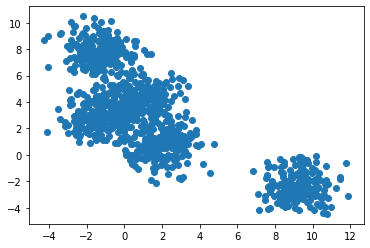

In [24]:
#Vamos observar a distribuição dos dados no espaço
#Provavelmente estavamos certos: A solução com 4 cluster é possível.
plt.scatter(clustering_df['0'],clustering_df['1'])

In [25]:
#Vamos reesvalar os dados
scaler.fit(clustering_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
reescaled_clustering_df = scaler.transform(clustering_df)

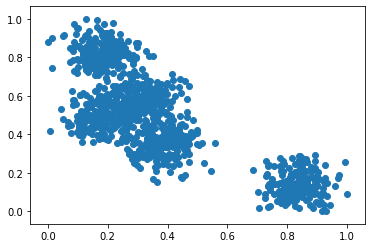

In [27]:
plt.scatter(reescaled_clustering_df[:,0],reescaled_clustering_df[:,1])

In [28]:
#Vamos treinar 10 modelos de kmeans, assumindo que teremos 1,2,3,4,5,6,7,8,9 ou 10 centroides otimos.
modelos_treinados = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    modelos_treinados.append(kmeans.fit(reescaled_clustering_df))

In [29]:
modelos_treinados

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=123, tol=0.0001, verbose=0),
 KMeans(algorithm='a

In [30]:
#Para cada modelo, vamos avaliar os centroides de acordo com a métrica de inercia (distância intra-clusters)
inercias = []
for modelo in modelos_treinados:
    inercias.append(modelo.inertia_)

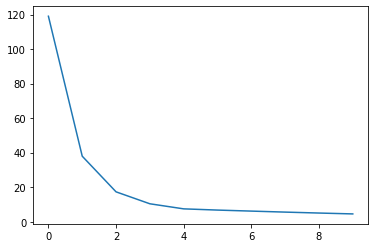

In [31]:
#Vamos buscar o ponto onde a curva começa a se tornar um platô. De forma subjetiva, podemos considerar o
#ponto 3 ou o ponto 4 (que se referem a cluster = 4 ou cluster = 5)
plt.plot(inercias)

In [32]:
cluster_escolhido = modelos_treinados[3]
clustering_df["cluster"] = cluster_escolhido.predict(reescaled_clustering_df)

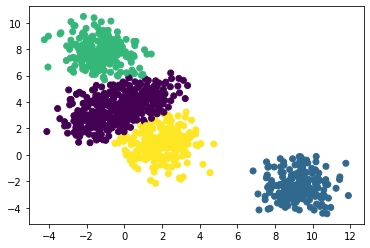

In [33]:
plt.scatter(clustering_df['0'],clustering_df['1'], c = clustering_df.cluster)